In [13]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
plt.rcParams.update(
    {
        "font.size": 10,
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsfonts}\usepackage{bm}",
    }
)
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["font.sans-serif"] = ["Computer Modern"]
plt.rcParams["font.monospace"] = ["Computer Modern"]
plt.rcParams["pgf.texsystem"] = "xelatex"  # o 'lualatex'

plt.rcParams["figure.figsize"] = (16, 9)
fontsize = 28
matplotlib.rcParams.update({"font.size": fontsize})

In [15]:
# Get all file names in current folder
files_airline = os.listdir("airline/")
files_taxi = os.listdir("taxi/")
files_year = os.listdir("year/")

In [16]:
# Concatenate all dataframes in a single one
df_airline = pd.concat(
    [pd.read_csv("airline/" + f) for f in files_airline if f.endswith(".csv")]
)
df_airline = df_airline.drop(columns=["dataset"])

df_year = pd.concat(
    [pd.read_csv("year/" + f) for f in files_year if f.endswith(".csv")]
)
df_year = df_year.drop(columns=["dataset"])

df_taxi = pd.concat(
    [pd.read_csv("taxi/" + f) for f in files_taxi if f.endswith(".csv")]
)
df_taxi = df_taxi.drop(columns=["dataset"])

In [17]:
models = df_taxi["method"].unique()
models = ["fmgp", "valla", "lla last_layer kron", "ella", "map"]
labels = ["FMGP", "VaLLA", "LLA", "ELLA", "MAP"]
print("Models: ", models)

Models:  ['fmgp', 'valla', 'lla last_layer kron', 'ella', 'map']


In [18]:
def std(x):
    return np.std(x)

In [19]:
# Group by "method" and "resnet" and compute average and std
df_airline = df_airline.groupby(["method"]).agg(["mean", std])
df_taxi = df_taxi.groupby(["method"]).agg(["mean", std])
df_year = df_year.groupby(["method"]).agg(["mean", std])

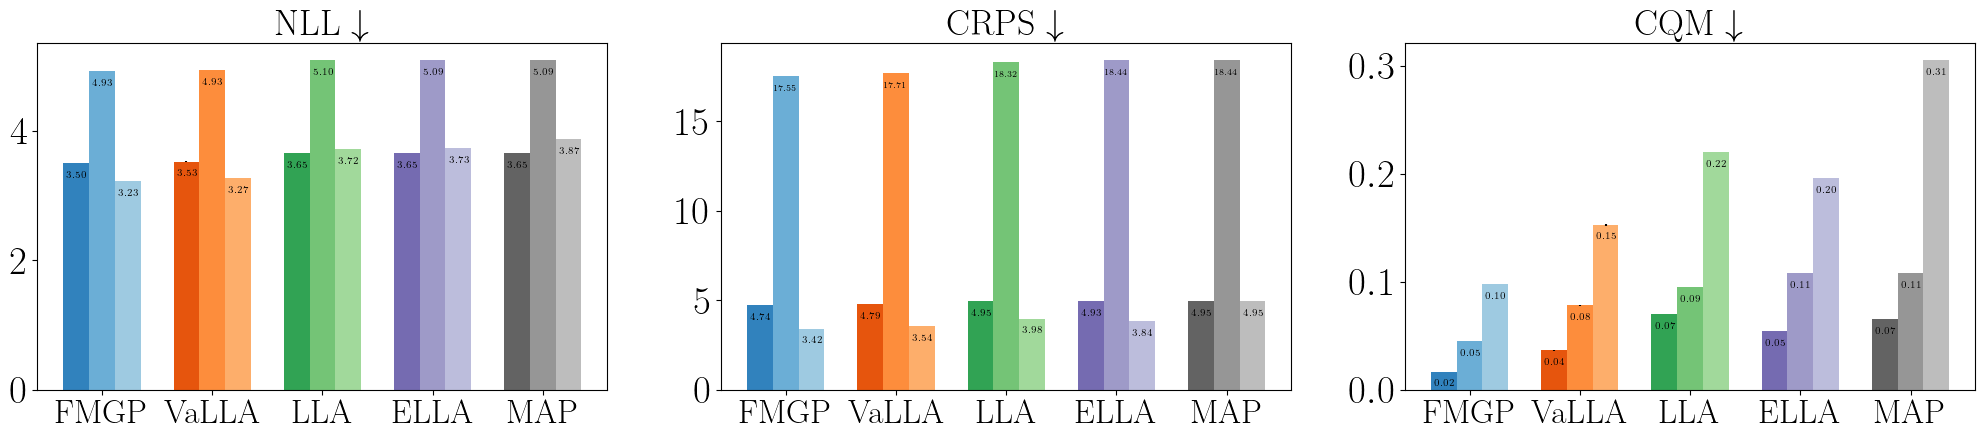

In [20]:
fig, axis = plt.subplots(1, 3, figsize=(25, 4.5))
# Plot NLL in axis 0
width = 0.7
width_bar = width / 3

jet = plt.colormaps["tab20c"]

for j, model in enumerate(models):
    nll = df_year.loc[model, ("NLL", "mean")]
    std = df_year.loc[model, ("NLL", "std")]
    bar = axis[0].bar(
        j - width_bar, nll, yerr=std, label=labels[j], color=jet(j * 4), width=width_bar
    )
    axis[0].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )
    nll = df_airline.loc[model, ("NLL", "mean")]
    std = df_airline.loc[model, ("NLL", "std")]
    bar = axis[0].bar(
        j, nll, yerr=std, label=labels[j], color=jet(j * 4 + 1), width=width_bar
    )
    axis[0].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )
    nll = df_taxi.loc[model, ("NLL", "mean")]
    std = df_taxi.loc[model, ("NLL", "std")]
    bar = axis[0].bar(
        j + width_bar,
        nll,
        yerr=std,
        label=labels[j],
        color=jet(j * 4 + 2),
        width=width_bar,
    )
    axis[0].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )

    # Plot CRPS
    nll = df_year.loc[model, ("CRPS", "mean")]
    std = df_year.loc[model, ("CRPS", "std")]
    bar = axis[1].bar(
        j - width_bar, nll, yerr=std, label=labels[j], color=jet(j * 4), width=width_bar
    )
    axis[1].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )
    nll = df_airline.loc[model, ("CRPS", "mean")]
    std = df_airline.loc[model, ("CRPS", "std")]
    bar = axis[1].bar(
        j, nll, yerr=std, label=labels[j], color=jet(j * 4 + 1), width=width_bar
    )
    axis[1].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 22
    )
    nll = df_taxi.loc[model, ("CRPS", "mean")]
    std = df_taxi.loc[model, ("CRPS", "std")]
    bar = axis[1].bar(
        j + width_bar,
        nll,
        yerr=std,
        label=labels[j],
        color=jet(j * 4 + 2),
        width=width_bar,
    )
    axis[1].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )

    # Plot Q
    nll = df_year.loc[model, ("CQM", "mean")]
    std = df_year.loc[model, ("CQM", "std")]
    bar = axis[2].bar(
        j - width_bar, nll, yerr=std, label=labels[j], color=jet(j * 4), width=width_bar
    )
    axis[2].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )
    nll = df_airline.loc[model, ("CQM", "mean")]
    std = df_airline.loc[model, ("CQM", "std")]
    bar = axis[2].bar(
        j, nll, yerr=std, label=labels[j], color=jet(j * 4 + 1), width=width_bar
    )
    axis[2].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )
    nll = df_taxi.loc[model, ("CQM", "mean")]
    std = df_taxi.loc[model, ("CQM", "std")]
    bar = axis[2].bar(
        j + width_bar,
        nll,
        yerr=std,
        label=labels[j],
        color=jet(j * 4 + 2),
        width=width_bar,
    )
    axis[2].bar_label(
        bar, fmt="{:,.2f}", label_type="edge", padding=-12, fontsize=fontsize - 21
    )


axis[0].set_title("NLL $\downarrow$", fontsize=fontsize - 2)
axis[0].set_xticks(range(len(models)))
axis[0].set_xticklabels(labels, fontsize=fontsize - 4)
axis[1].set_title("CRPS $\downarrow$", fontsize=fontsize - 2)
axis[1].set_xticks(range(len(models)))
axis[1].set_xticklabels(labels, fontsize=fontsize - 4)
axis[2].set_title("CQM $\downarrow$", fontsize=fontsize - 2)
axis[2].set_xticks(range(len(models)))
axis[2].set_xticklabels(labels, fontsize=fontsize - 4)
plt.savefig("regression.pdf", bbox_inches="tight", dpi=300)
plt.show()

In [21]:
def std(x):
    return np.std(x)


In [23]:
files_qm9 = os.listdir("QM9/")
df_qm9 = pd.concat([pd.read_csv("QM9/" + f) for f in files_qm9 if f.endswith(".csv")])
df_qm9 = df_qm9.drop(columns=["dataset", "mae"])
models = ["fmgp", "lla", "ella", "map"]
labels = ["FMGP", "LLA", "ELLA", "MAP"]
df_qm9 = df_qm9.groupby(["method"]).agg(["mean", std])
df_qm9


train_time              test_time                 nll            \
                mean        std        mean       std      mean       std   
method                                                                      
ella     4912.666898  21.207791  131.254908  0.559127 -1.800385  0.013579   
fmgp    17471.004781  91.499643  128.975503  1.920871 -1.859922  0.017337   
lla      1875.088194  13.877084  133.317947  2.126222 -1.783436  0.021269   
map      1334.246736  19.282828  135.638406  4.083380 -1.761922  0.016339   

            crps           seed            
            mean       std mean       std  
method                                     
ella    0.021947  0.000198  2.0  1.414214  
fmgp    0.021689  0.000197  2.0  1.414214  
lla     0.021871  0.000183  2.0  1.414214  
map     0.022171  0.000179  2.0  1.414214